# Scraped Recipe Data Visualization
- https://scikit-learn.org/stable/tutorial/basic/tutorial.html
- https://www.kaggle.com/andreanuzzo/balance-the-imbalanced-rf-and-xgboost-with-smote

In [58]:
import math 
from statistics import mean
import pandas as pd  
import numpy as np
import matplotlib
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [59]:
df = pd.read_csv ('df_original_scrape.csv')

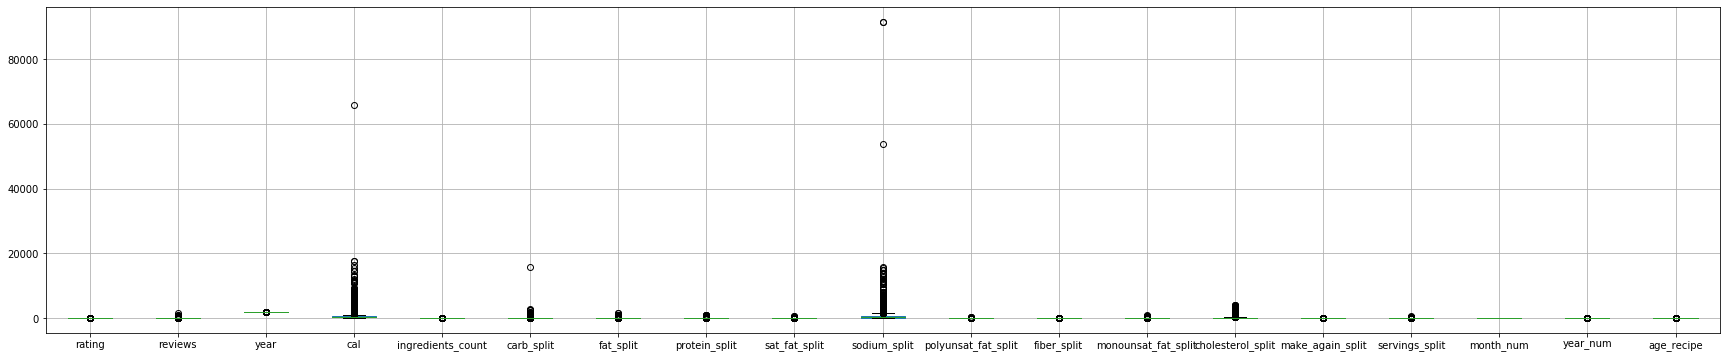

In [60]:
df.boxplot(figsize=(30, 6))

In [61]:
df.shape

(37085, 45)

In [62]:
numeric_features = ['rating','reviews','year','cal','fat_split','protein_split','ingredients_count',
                    'carb_split','sat_fat_split','sodium_split','polyunsat_fat_split',
                    'fiber_split','monounsat_fat_split','cholesterol_split',
                    'make_again_split','servings_split','month_num','year_num','age_recipe']

In [63]:
len(numeric_features)

19

In [64]:
df_numeric_featues = df[numeric_features].copy()
df_numeric_featues.describe()

,rating,reviews,year,cal,fat_split,protein_split,ingredients_count,carb_split,sat_fat_split,sodium_split,polyunsat_fat_split,fiber_split,monounsat_fat_split,cholesterol_split,make_again_split,servings_split,month_num,year_num,age_recipe
count,37057.000000,37057.000000,35567.000000,27732.000000,27650.000000,27682.000000,37085.000000,27702.000000,27640.000000,27731.000000,27634.000000,27262.000000,27633.000000,21730.000000,37057.000000,27483.000000,35568.000000,35567.000000,35567.000000
mean,2.977454,19.138624,2003.676779,473.184805,26.470452,17.311358,9.737549,41.391524,9.522395,484.835527,3.616740,3.827562,11.318894,115.521261,76.216612,8.720482,6.872132,16.323221,16.895910
std,1.062807,35.914379,8.631787,773.353958,43.077397,29.062253,4.553635,122.054949,18.158504,1100.964028,6.668405,5.060075,20.334114,191.870720,30.507350,11.581470,3.475246,8.631787,8.646773
min,0.000000,0.000000,1922.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.083333
25%,3.000000,3.000000,1998.000000,194.000000,8.000000,3.000000,7.000000,12.000000,2.000000,84.000000,1.000000,1.000000,3.000000,25.000000,71.000000,4.000000,4.000000,11.000000,11.083333
50%,3.500000,9.000000,2004.000000,323.000000,17.000000,8.000000,9.000000,27.000000,5.000000,270.000000,2.000000,3.000000,7.000000,71.000000,88.000000,6.000000,7.000000,16.000000,16.833333
75%,3.500000,21.000000,2009.000000,553.000000,31.000000,23.000000,12.000000,49.000000,12.000000,616.000000,4.000000,5.000000,13.000000,143.000000,100.000000,8.000000,10.000000,22.000000,22.416667
max,4.000000,1599.000000,2019.000000,65880.000000,1528.000000,1067.000000,51.000000,15917.000000,663.000000,91681.000000,246.000000,145.000000,1003.000000,4046.000000,100.000000,654.000000,12.000000,98.000000,98.583333


In [111]:
df_numeric_featues.dropna(inplace = True)
df_numeric_featues['rating'].value_counts()

3.5    9174
3.0    5604
4.0    2774
2.5    1580
0.0     965
2.0     496
1.0     156
1.5     111
Name: rating, dtype: int64

# No Scalar

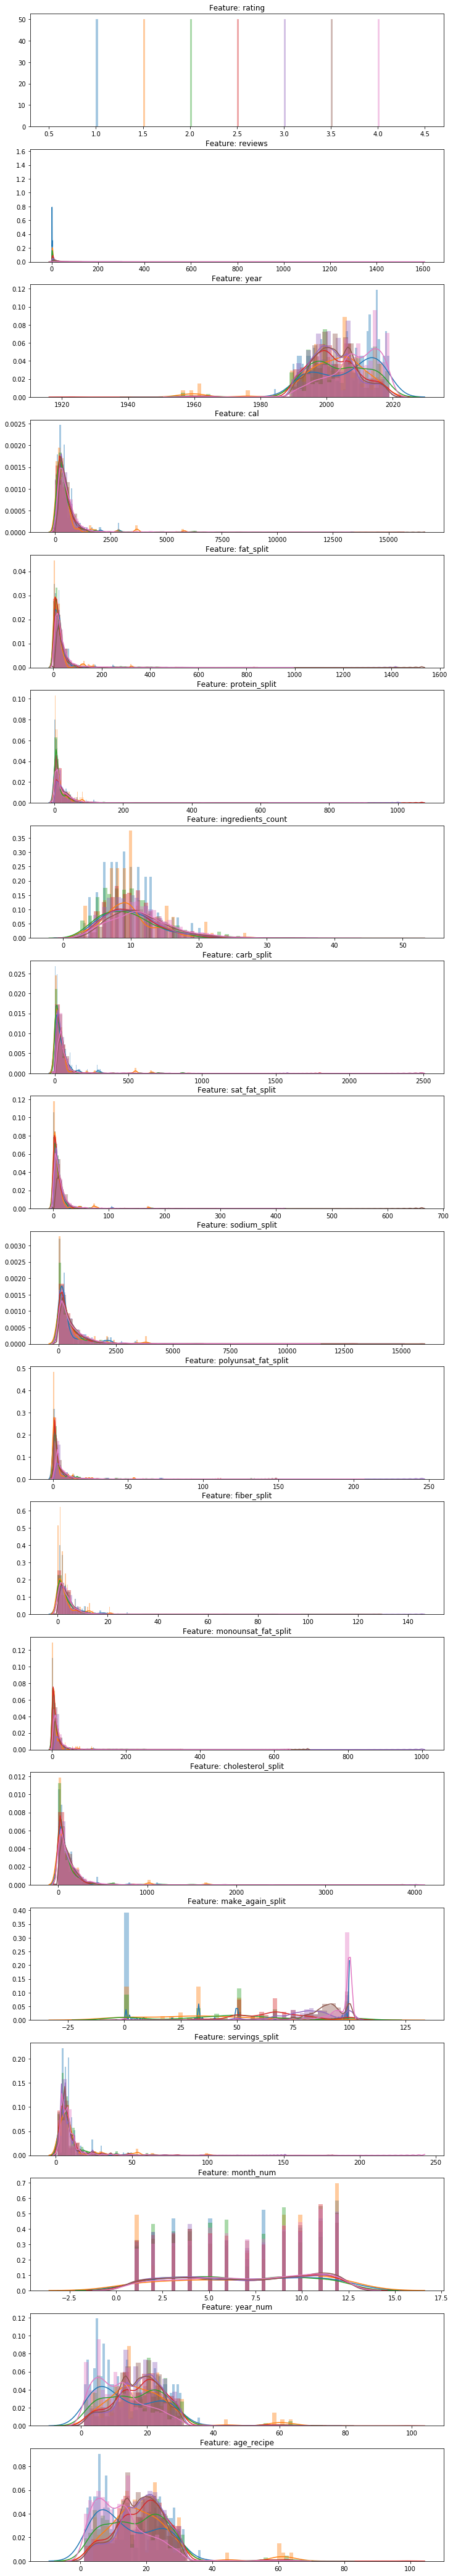

In [114]:
plt.figure(figsize=(12,19*4))
import matplotlib.gridspec as gridspec
from scipy.stats import norm

features = df_numeric_featues.iloc[:,0:19].columns
gs = gridspec.GridSpec(19, 1)

for i, feature in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df_numeric_featues[feature][df.rating == 1.0], bins=50)
    sns.distplot(df_numeric_featues[feature][df.rating == 1.5], bins=50)
    sns.distplot(df_numeric_featues[feature][df.rating == 2.0], bins=50)
    sns.distplot(df_numeric_featues[feature][df.rating == 2.5], bins=50)
    sns.distplot(df_numeric_featues[feature][df.rating == 3.0], bins=50)
    sns.distplot(df_numeric_featues[feature][df.rating == 3.5], bins=50)
    sns.distplot(df_numeric_featues[feature][df.rating == 4.0], bins=50)
    
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(feature))
plt.show()

In [123]:
plt.savefig('No_Scalar_Feature_Visualization.png')

<Figure size 432x288 with 0 Axes>

# Min/Max Scalar

In [115]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_numeric_featues)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_features)

In [116]:
scaled_df.describe()

,rating,reviews,year,cal,fat_split,protein_split,ingredients_count,carb_split,sat_fat_split,sodium_split,polyunsat_fat_split,fiber_split,monounsat_fat_split,cholesterol_split,make_again_split,servings_split,month_num,year_num,age_recipe
count,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000,20860.000000
mean,0.782377,0.014849,0.837507,0.008075,0.020206,0.019635,0.197301,0.002729,0.017516,0.034386,0.016704,0.025892,0.012694,0.028386,0.803509,0.034287,0.538852,0.162493,0.166726
std,0.213181,0.026150,0.084822,0.012597,0.030330,0.029242,0.090727,0.008509,0.029438,0.047911,0.029163,0.035245,0.021642,0.046480,0.250417,0.045391,0.322443,0.084822,0.084470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.002502,0.783505,0.003567,0.007199,0.004686,0.140000,0.000817,0.006033,0.008292,0.004065,0.006897,0.003988,0.006179,0.750000,0.012552,0.272727,0.103093,0.111111
50%,0.875000,0.006879,0.835052,0.005829,0.013743,0.010309,0.180000,0.001759,0.010558,0.020825,0.008130,0.020690,0.007976,0.017301,0.880000,0.020921,0.545455,0.164948,0.170085
75%,0.875000,0.016886,0.896907,0.009350,0.023560,0.027179,0.240000,0.003204,0.021116,0.044246,0.020325,0.034483,0.014955,0.035344,0.960000,0.037657,0.818182,0.216495,0.223932
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


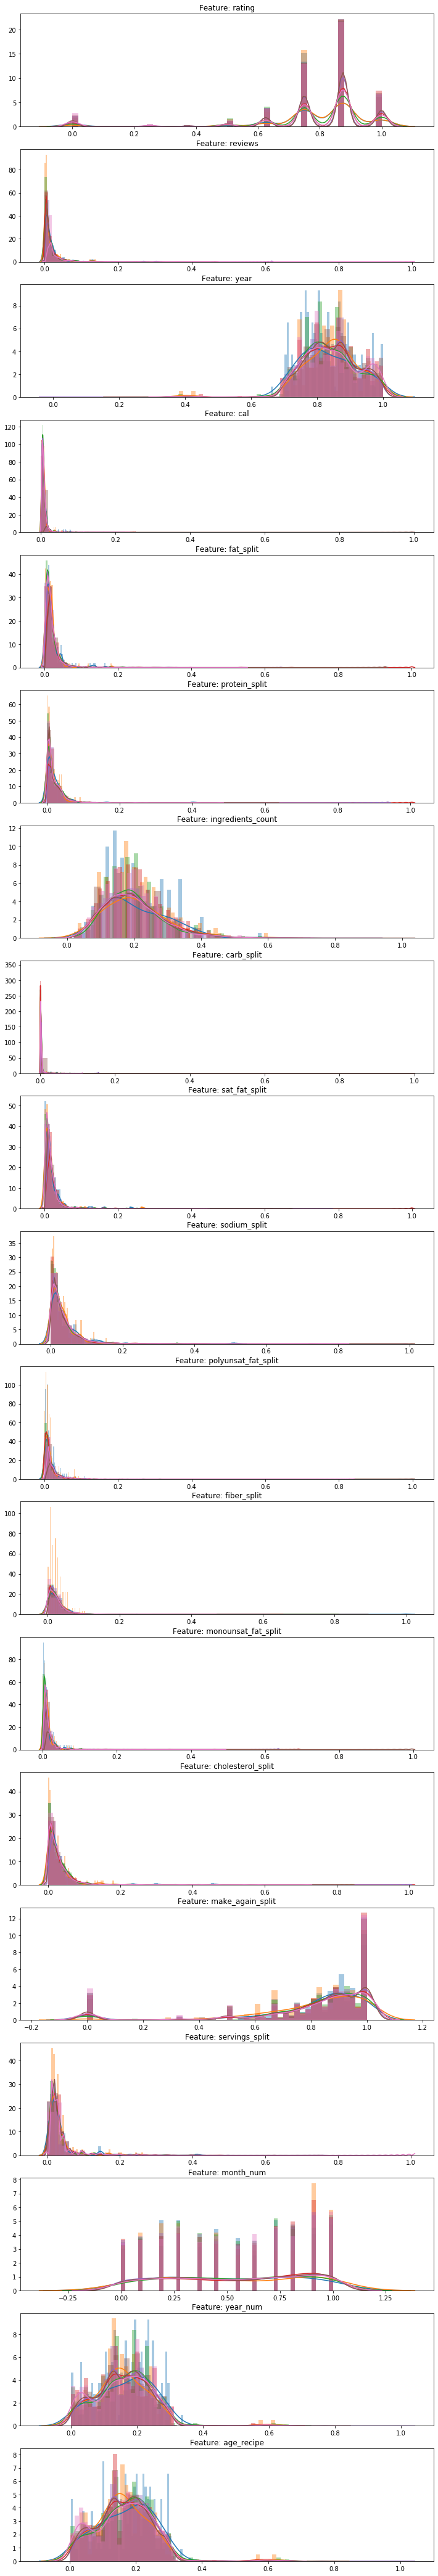

In [117]:
plt.figure(figsize=(12,19*4))
import matplotlib.gridspec as gridspec

features = scaled_df.iloc[:,0:19].columns
gs = gridspec.GridSpec(19, 1)

for i, feature in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(scaled_df[feature][df.rating == 1.0], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 1.5], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 2.0], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 2.5], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 3.0], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 3.5], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 4.0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(feature))
plt.show()

In [124]:
plt.savefig('Min_Max_Scalar_Feature_Visualization.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
# Export Features Univarite Comparison

# Standard Scalar

In [118]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_numeric_featues)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_features)

In [119]:
# scaled_df.describe()

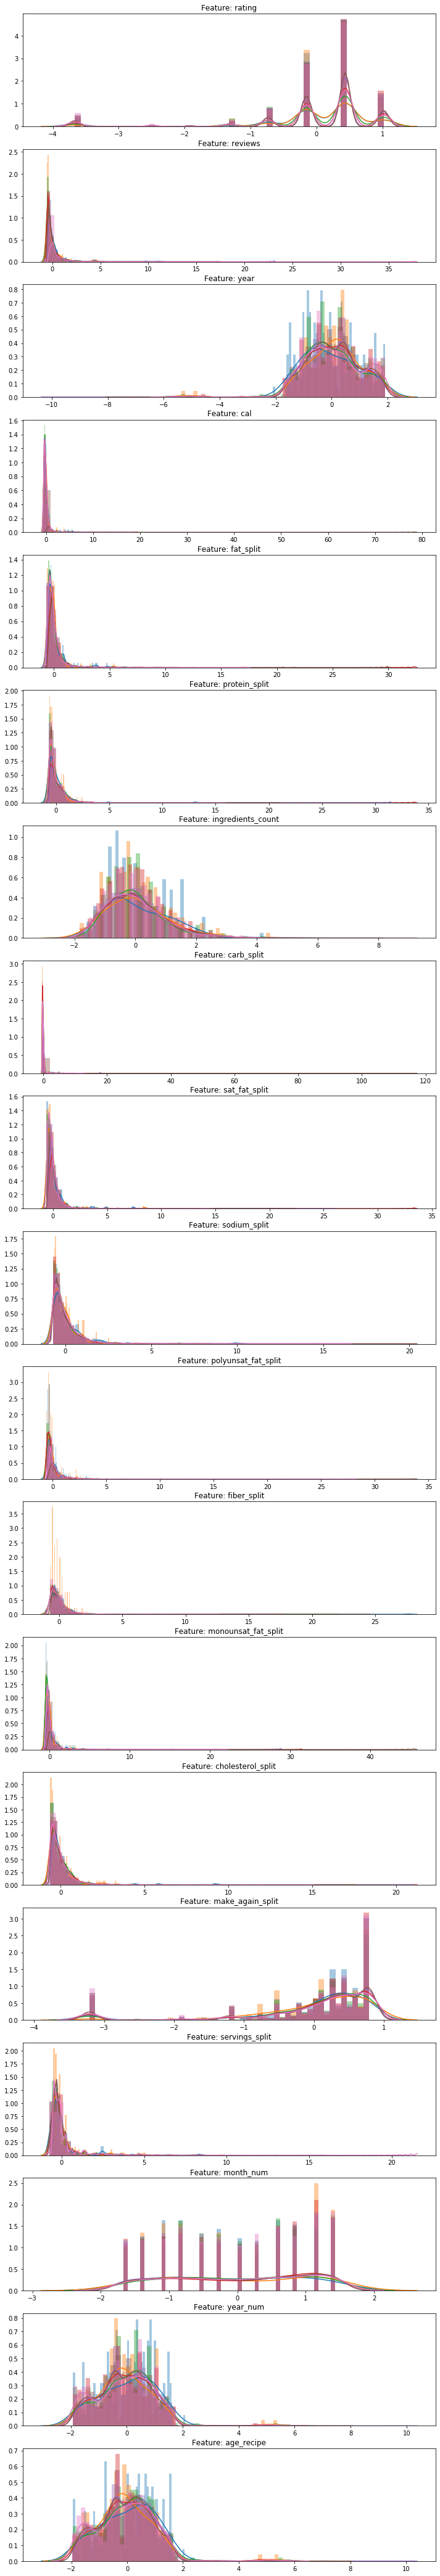

In [120]:
plt.figure(figsize=(12,19*4))
import matplotlib.gridspec as gridspec

features = scaled_df.iloc[:,0:19].columns
gs = gridspec.GridSpec(19, 1)

for i, feature in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(scaled_df[feature][df.rating == 1.0], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 1.5], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 2.0], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 2.5], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 3.0], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 3.5], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 4.0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(feature))
plt.show()

In [125]:
plt.savefig('Standard_Scalar_Feature_Visualization.png')

<Figure size 432x288 with 0 Axes>

# Normalizer

In [121]:
scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df_numeric_featues)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_features)

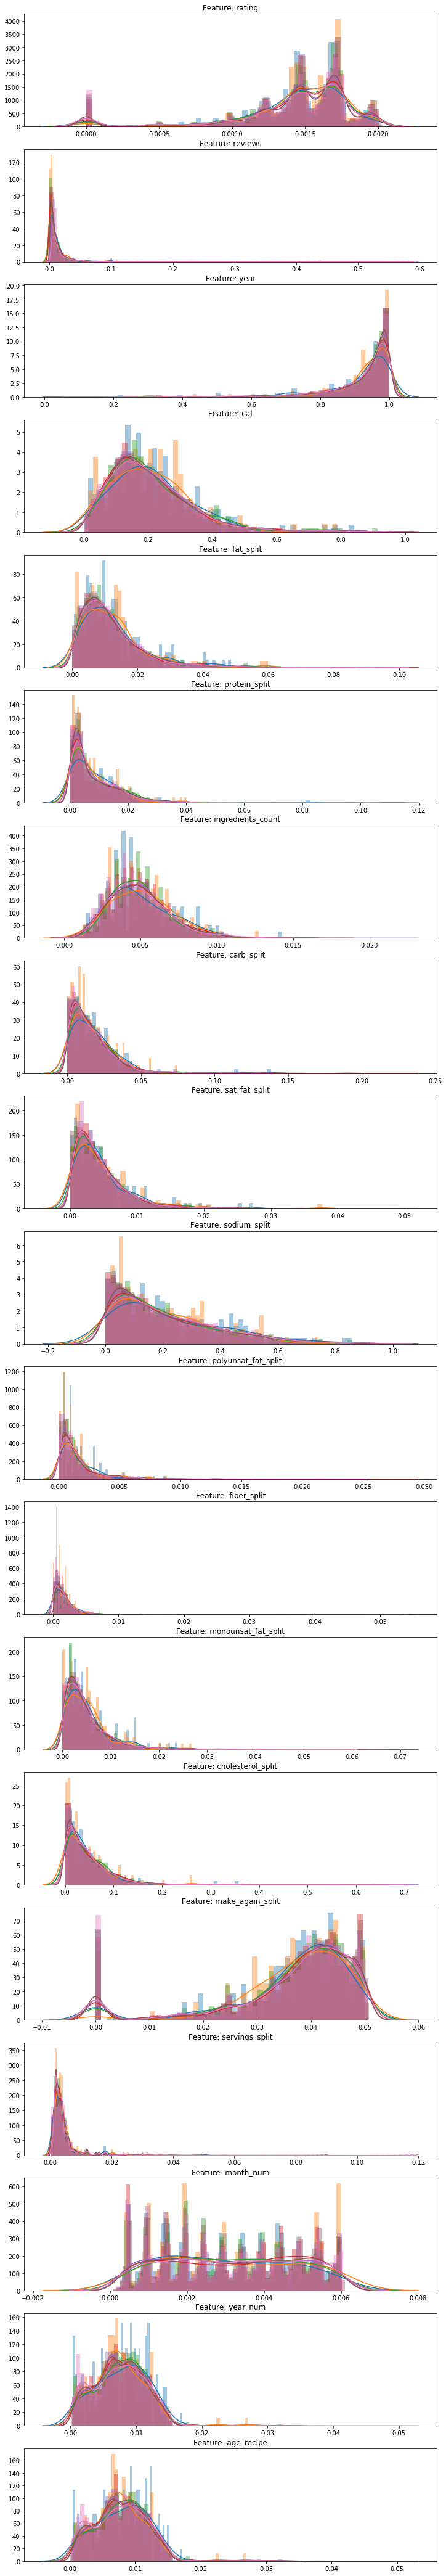

In [122]:
plt.figure(figsize=(12,19*4))
import matplotlib.gridspec as gridspec

features = scaled_df.iloc[:,0:19].columns
gs = gridspec.GridSpec(19, 1)

for i, feature in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(scaled_df[feature][df.rating == 1.0], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 1.5], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 2.0], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 2.5], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 3.0], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 3.5], bins=50)
    sns.distplot(scaled_df[feature][df.rating == 4.0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(feature))
plt.show()

In [126]:
plt.savefig('Normalizer_Feature_Visualization.png')

<Figure size 432x288 with 0 Axes>